<a href="https://colab.research.google.com/github/juliomestas/Ciencia_y_analitica_de_datos/blob/main/Actividad6FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: JULIO CESAR MESTAS DELGADO
*   MATRÍCULA: A01794827

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/Documentos/Tec de Monterrey/MNA/Ciencia y analitica de datos/Semana 6/"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

In [ ]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.


In [ ]:
columns_to_drop = ['id', 'VIN', 'url', 'image_url', 'description', 'posting_date']

# Eliminar las columnas
cars_df = cars_df.drop(columns=columns_to_drop)

# Verificar que las columnas se hayan eliminado
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  county        0 non-null       float64
 17  state         426880 non-null  object 
 18  lat 

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [ ]:
# Almacenar el número de observaciones o registros
num_observations = cars_df.shape[0]

# Almacenar el número de columnas
num_columns = cars_df.shape[1]

print(f'Número de observaciones: {num_observations}')
print(f'Número de columnas: {num_columns}')

Número de observaciones: 426880
Número de columnas: 20


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [ ]:
# Paso 1: Calcula el porcentaje de valores faltantes por columna
missing_percentage = (cars_df.isnull().sum() / len(cars_df)) * 100

print("Porcentaje de valores faltantes por columna antes de eliminar:")
print(missing_percentage)

Porcentaje de valores faltantes por columna antes de eliminar:
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
dtype: float64


In [ ]:
# Paso 2: Usa el parámetro thresh de dropna()
# thresh define el número mínimo de valores no faltantes requeridos para mantener la columna.
# Por lo tanto, configuramos thresh para ser igual al 70% de num_observations para asegurarnos
# de que mantenemos solo las columnas que tienen al menos el 70% de valores no faltantes.
threshold = 0.7 * num_observations
cars_df_cleaned = cars_df.dropna(axis=1, thresh=threshold)

In [ ]:
# Paso 3: Determina cuántas columnas se eliminaron
columns_dropped = num_columns - cars_df_cleaned.shape[1]

print(f'\nNúmero de columnas eliminadas: {columns_dropped}')


Número de columnas eliminadas: 6


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [ ]:
# Paso 1: Identifica las columnas con menos del 5% de valores faltantes
columns_less_than_5_percent_missing = missing_percentage[missing_percentage < 5].index.tolist()

In [ ]:
# Paso 2: Usa el parámetro subset de dropna() para eliminar registros
initial_num_observations = num_observations  # Guarda el número de registros antes de eliminar
cars_df_cleaned = cars_df_cleaned.dropna(subset=columns_less_than_5_percent_missing)

In [ ]:
# Paso 3: Calcula el porcentaje de registros que se eliminaron
percentage_removed = ((initial_num_observations - len(cars_df_cleaned)) / initial_num_observations) * 100

print(f"Porcentaje de registros eliminados: {percentage_removed:.2f}%")

Porcentaje de registros eliminados: 10.16%


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [ ]:
# Variables numéricas
numerical_cols = cars_df_cleaned.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    # Si la columna tiene valores perdidos
    if cars_df_cleaned[col].isnull().sum() > 0:
        # Si la columna está sesgada (usamos una regla empírica donde si la diferencia entre mean y median es significativa, la columna puede ser sesgada)
        if abs(cars_df_cleaned[col].mean() - cars_df_cleaned[col].median()) > cars_df_cleaned[col].std():
            cars_df_cleaned[col].fillna(cars_df_cleaned[col].median(), inplace=True)
        else:
            cars_df_cleaned[col].fillna(cars_df_cleaned[col].mean(), inplace=True)

# Variables categóricas
categorical_cols = cars_df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_cols:
    # Si la columna tiene valores perdidos
    if cars_df_cleaned[col].isnull().sum() > 0:
        cars_df_cleaned[col].fillna(cars_df_cleaned[col].mode()[0], inplace=True)

print("Imputación completada.")

Imputación completada.


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

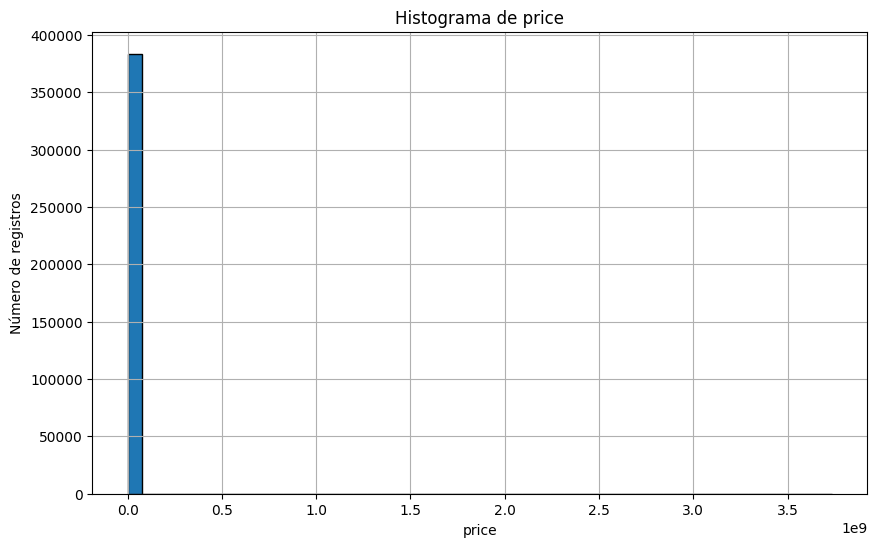

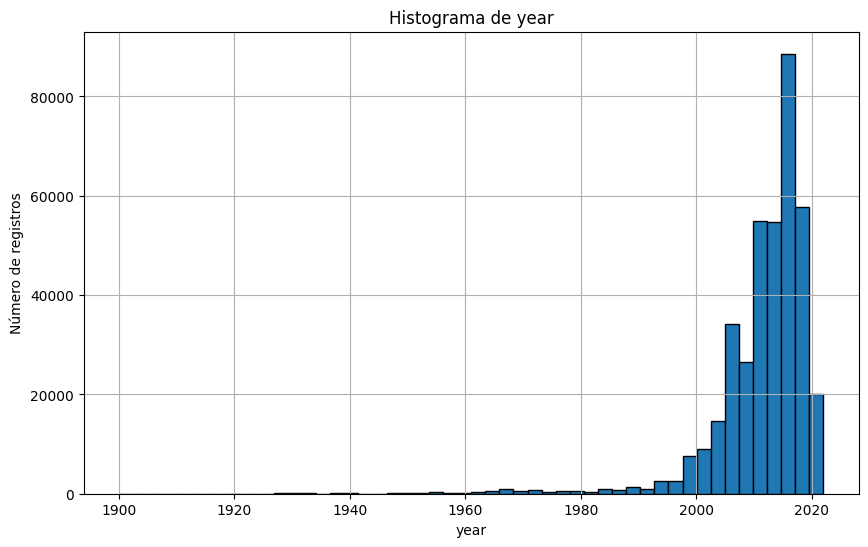

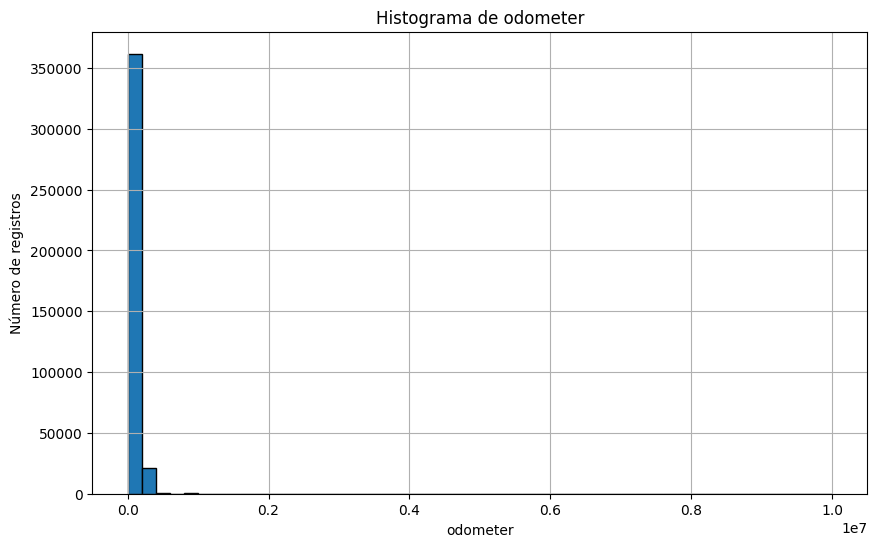

In [ ]:
# Definir las variables a visualizar
variables = ['price', 'year', 'odometer']

# Crear un histograma para cada variable
for var in variables:
    plt.figure(figsize=(10, 6))
    plt.hist(cars_df_cleaned[var].dropna(), bins=50, edgecolor='k')  # Ignorar valores NaN por si acaso
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Número de registros')
    plt.grid(True)
    plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

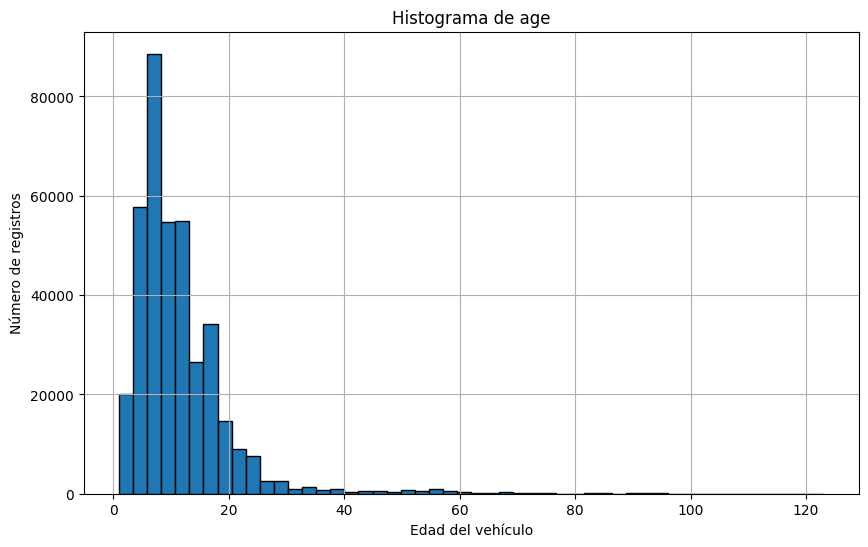

In [ ]:
# Añadir la columna 'age'
cars_df_cleaned['age'] = 2023 - cars_df_cleaned['year']

# Eliminar la columna 'year'
cars_df_cleaned.drop(columns=['year'], inplace=True)

# Generar el histograma para 'age'
plt.figure(figsize=(10, 6))
plt.hist(cars_df_cleaned['age'].dropna(), bins=50, edgecolor='k')  # Ignorar valores NaN por si acaso
plt.title('Histograma de age')
plt.xlabel('Edad del vehículo')
plt.ylabel('Número de registros')
plt.grid(True)
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

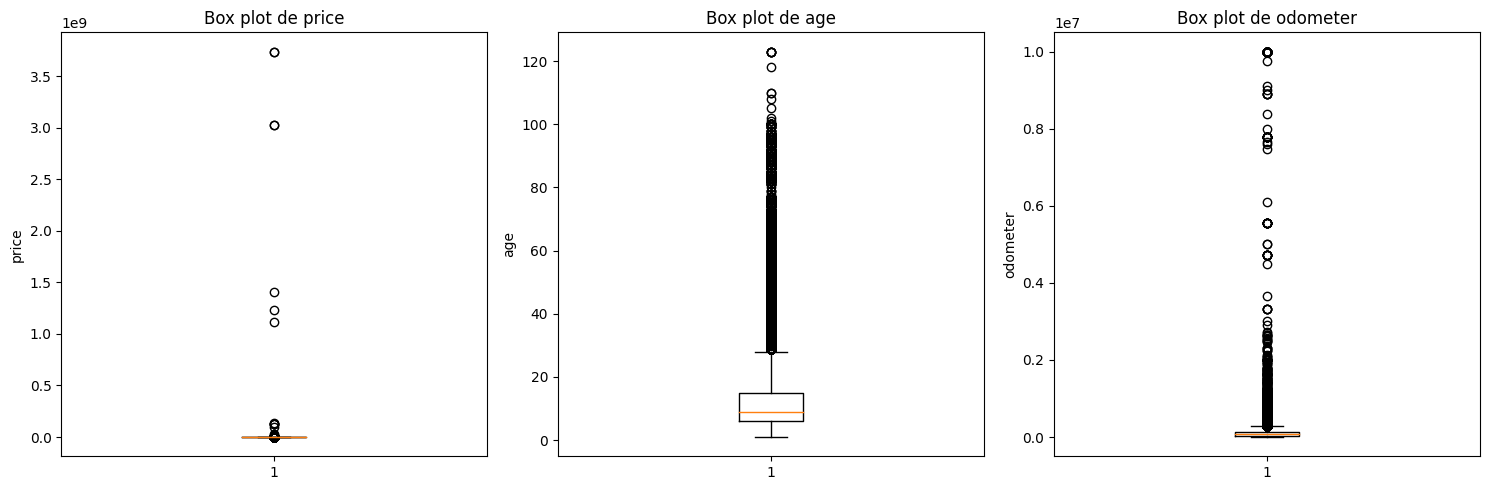

In [ ]:
variables = ['price', 'age', 'odometer']

plt.figure(figsize=(15, 5))

# Crear un box plot para cada variable
for idx, var in enumerate(variables, 1):
    plt.subplot(1, 3, idx)
    plt.boxplot(cars_df_cleaned[var].dropna())  # Ignorar valores NaN por si acaso
    plt.title(f'Box plot de {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [ ]:
initial_records = cars_df_cleaned.shape[0]
outliers_indices = set()

variables = ['price', 'age', 'odometer']

for var in variables:
    Q1 = cars_df_cleaned[var].quantile(0.25)
    Q3 = cars_df_cleaned[var].quantile(0.75)
    IQR = Q3 - Q1

    # Identificar índices de valores atípicos para la variable actual
    outliers_var = cars_df_cleaned[(cars_df_cleaned[var] < (Q1 - 1.5 * IQR)) | (cars_df_cleaned[var] > (Q3 + 1.5 * IQR))].index
    outliers_indices.update(outliers_var)

    # Calcular el porcentaje de valores atípicos
    outliers_percentage = len(outliers_var) / initial_records * 100
    print(f"Porcentaje de valores atípicos para {var}: {outliers_percentage:.2f}%")

# Eliminar valores atípicos
cars_df_cleaned = cars_df_cleaned.drop(outliers_indices)

# Calcular el porcentaje total de registros eliminados
percentage_removed = (initial_records - cars_df_cleaned.shape[0]) / initial_records * 100

print(f"\nPorcentaje total de registros eliminados: {percentage_removed:.2f}%")

Porcentaje de valores atípicos para price: 1.64%
Porcentaje de valores atípicos para age: 3.14%
Porcentaje de valores atípicos para odometer: 0.81%

Porcentaje total de registros eliminados: 5.40%


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

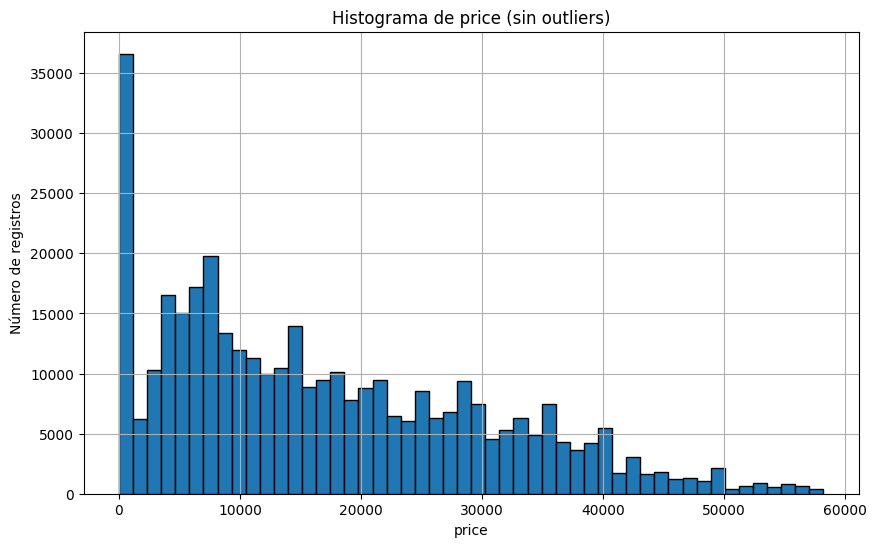

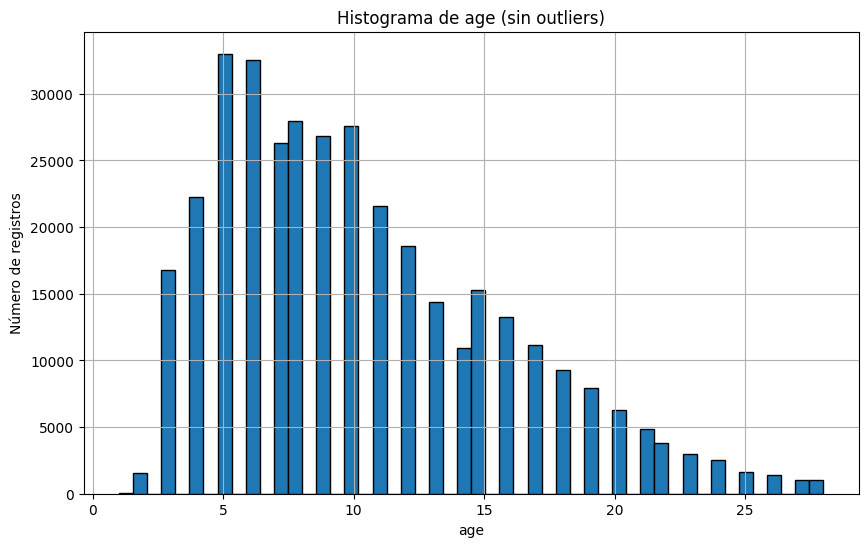

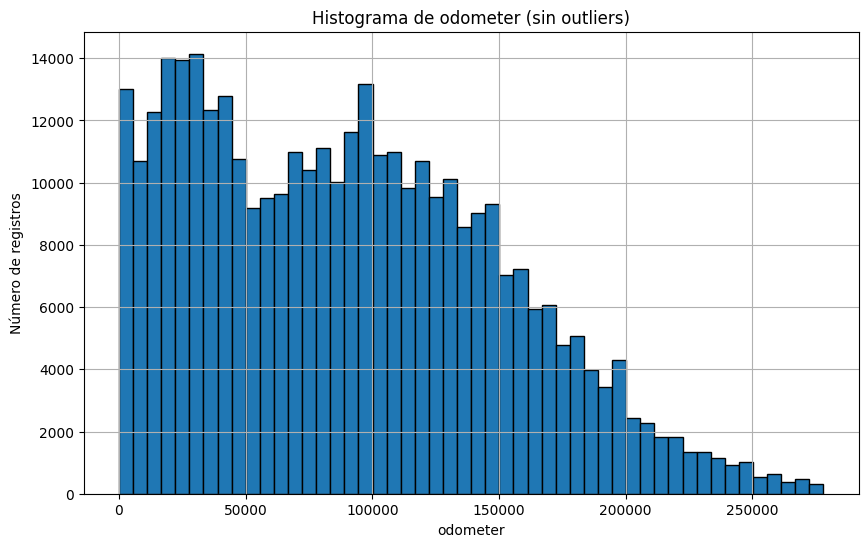

In [ ]:
variables = ['price', 'age', 'odometer']

# Crear un histograma para cada variable
for var in variables:
    plt.figure(figsize=(10, 6))
    plt.hist(cars_df_cleaned[var].dropna(), bins=50, edgecolor='k')  # Ignorar valores NaN por si acaso
    plt.title(f'Histograma de {var} (sin outliers)')
    plt.xlabel(var)
    plt.ylabel('Número de registros')
    plt.grid(True)
    plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


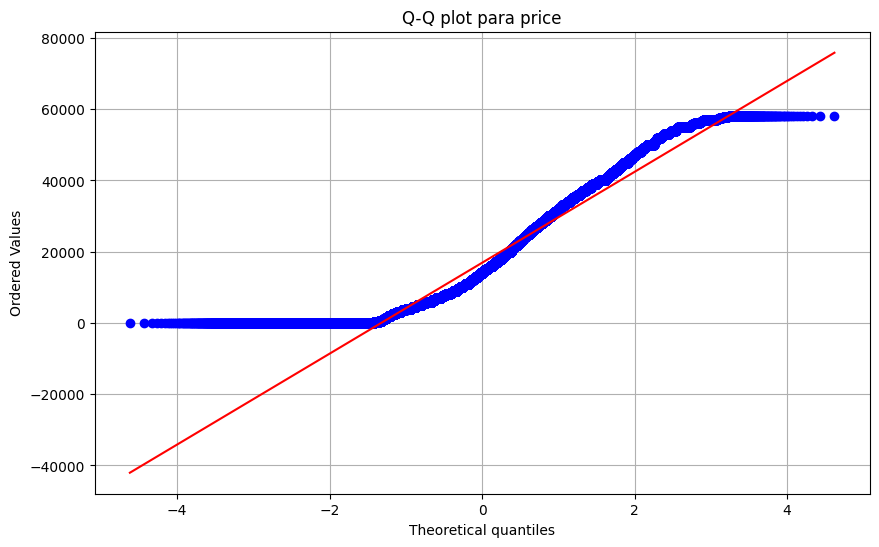

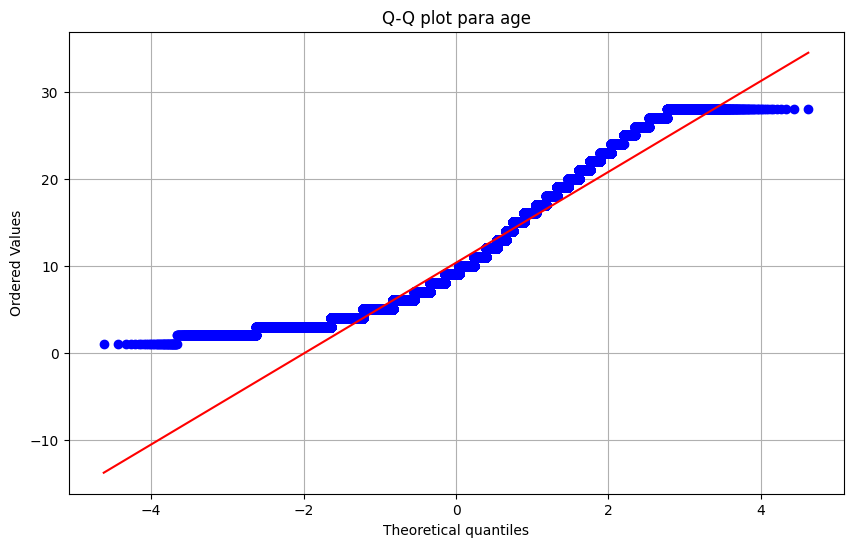

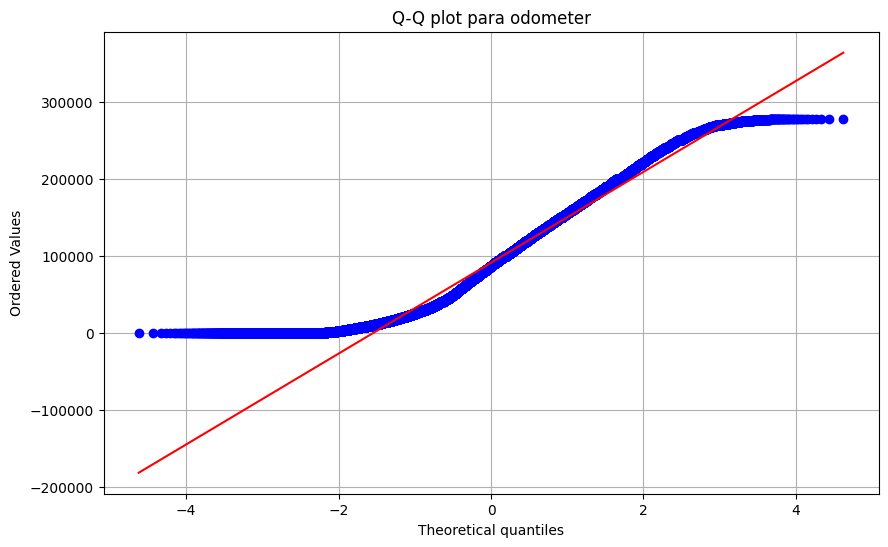

In [ ]:
variables = ['price', 'age', 'odometer']

for var in variables:
    plt.figure(figsize=(10, 6))
    stats.probplot(cars_df_cleaned[var].dropna(), dist="norm", plot=plt)  # Ignorar valores NaN por si acaso
    plt.title(f'Q-Q plot para {var}')
    plt.grid(True)
    plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [ ]:
# Hacer una copia del dataframe
transf_df = cars_df_cleaned.copy()



In [ ]:
# Instanciar el transformador de Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Aplicar la transformación a las columnas 'price' y 'odometer'
for col in ['price', 'odometer']:
    transf_df[col] = pt.fit_transform(transf_df[[col]])

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

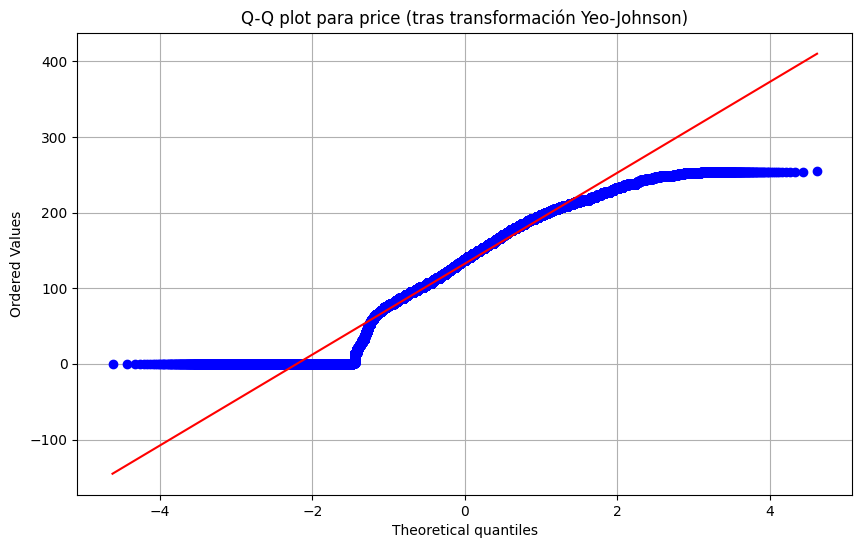

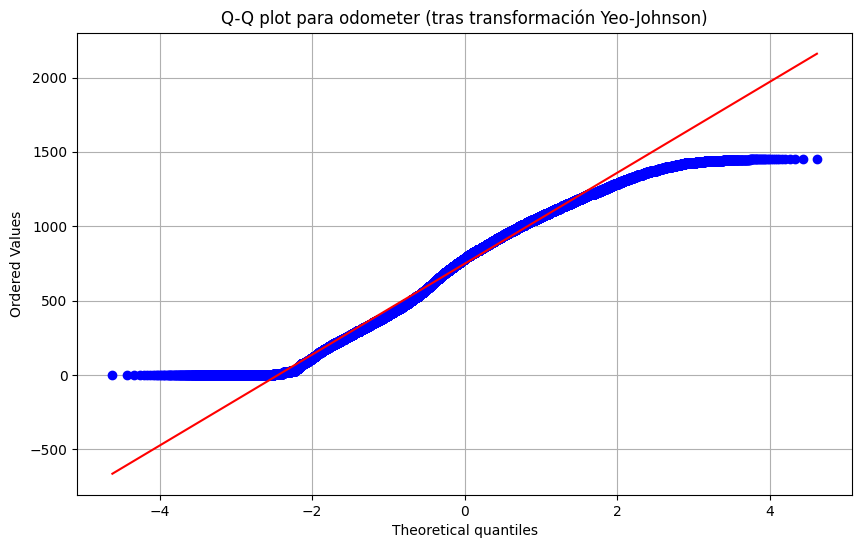

In [ ]:
variables = ['price', 'odometer']

for var in variables:
    plt.figure(figsize=(10, 6))
    stats.probplot(transf_df[var].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot para {var} (tras transformación Yeo-Johnson)')
    plt.grid(True)
    plt.show()

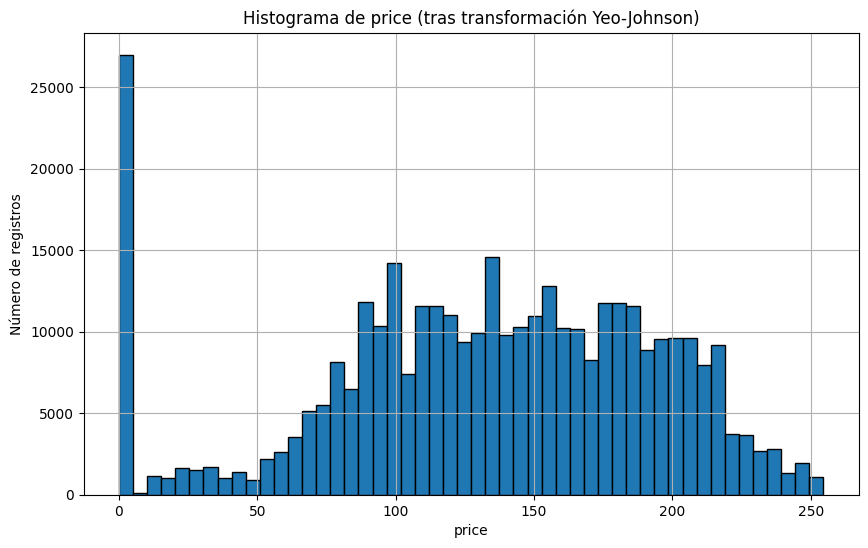

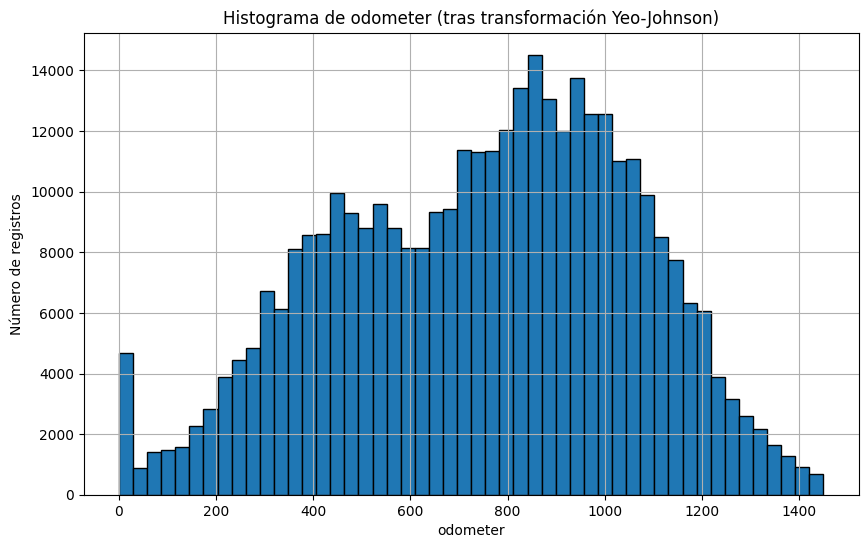

In [ ]:
for var in variables:
    plt.figure(figsize=(10, 6))
    plt.hist(transf_df[var].dropna(), bins=50, edgecolor='k')
    plt.title(f'Histograma de {var} (tras transformación Yeo-Johnson)')
    plt.xlabel(var)
    plt.ylabel('Número de registros')
    plt.grid(True)
    plt.show()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Hacer una copia del dataframe
minmax_df = transf_df.copy()

# Instanciar el escalador Min-Max
scaler = MinMaxScaler()

# Aplicar el escalamiento a las columnas 'price', 'age', y 'odometer'
for col in ['price', 'age', 'odometer']:
    minmax_df[col] = scaler.fit_transform(minmax_df[[col]])

6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

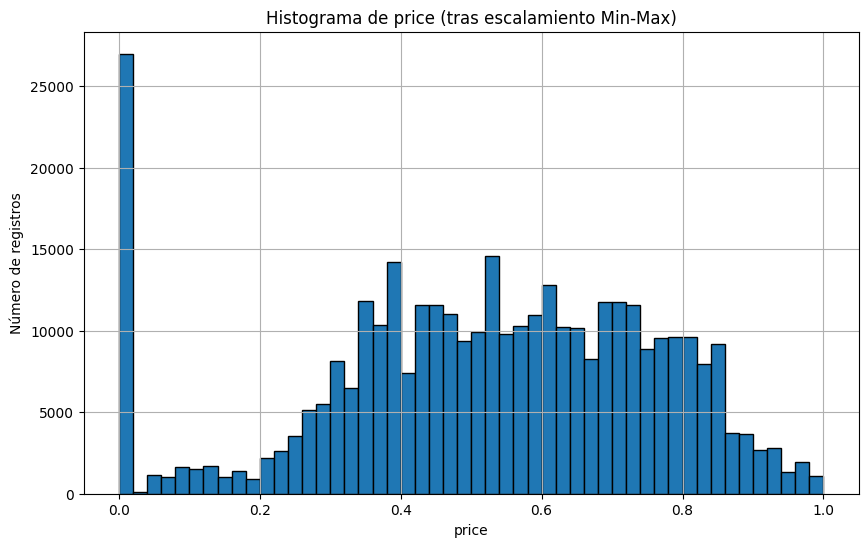

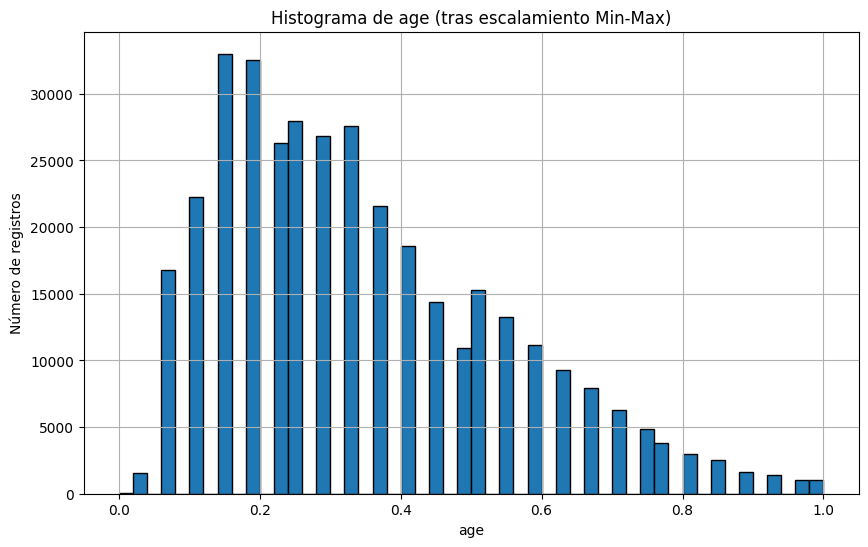

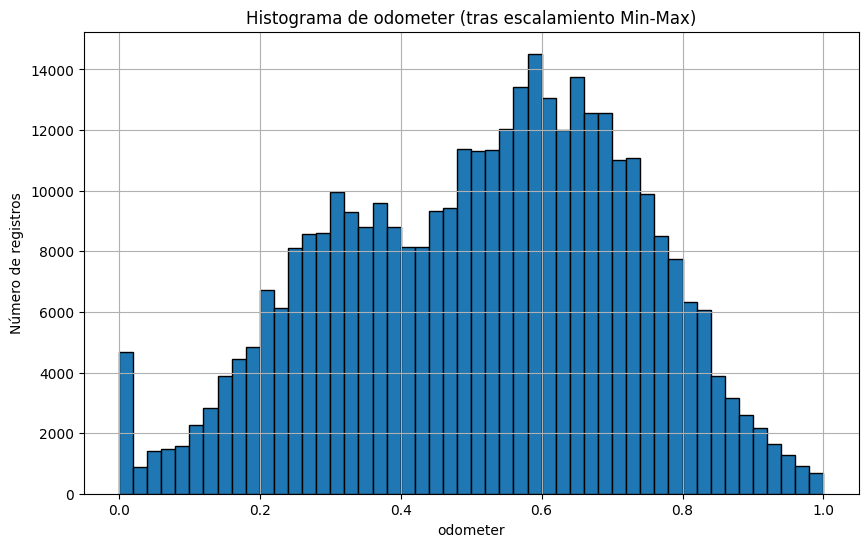

In [ ]:
variables = ['price', 'age', 'odometer']

for var in variables:
    plt.figure(figsize=(10, 6))
    plt.hist(minmax_df[var].dropna(), bins=50, edgecolor='k')  # Ignorar valores NaN por si acaso
    plt.title(f'Histograma de {var} (tras escalamiento Min-Max)')
    plt.xlabel(var)
    plt.ylabel('Número de registros')
    plt.grid(True)
    plt.show()

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [ ]:
# Identificar las columnas categóricas
categorical_cols = minmax_df.select_dtypes(include=['object']).columns

# Aplicar el método describe() a las columnas categóricas
categorical_summary = minmax_df[categorical_cols].describe()

print(categorical_summary)

          region                          region_url manufacturer   model  \
count     362763                              362763       362763  362763   
unique       404                                 413           40   19263   
top     columbus  https://grandrapids.craigslist.org         ford   f-150   
freq        3015                                2743        61186    7197   

          fuel title_status transmission    type   state  
count   362763       362763       362763  362763  362763  
unique       5            6            3      13      51  
top        gas        clean    automatic   sedan      ca  
freq    309289       351101       288241  153765   42325  


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

In [ ]:
# Lista de variables categóricas
categorical_cols = minmax_df.select_dtypes(include=['object']).columns

# Separar variables según su cardinalidad
highly_cardinal_variables = [col for col in categorical_cols if minmax_df[col].nunique() > 10]
few_cardinal_variables = [col for col in categorical_cols if minmax_df[col].nunique() <= 10]

print("Variables con alta cardinalidad:", highly_cardinal_variables)
print("Variables con baja cardinalidad:", few_cardinal_variables)

Variables con alta cardinalidad: ['region', 'region_url', 'manufacturer', 'model', 'type', 'state']
Variables con baja cardinalidad: ['fuel', 'title_status', 'transmission']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

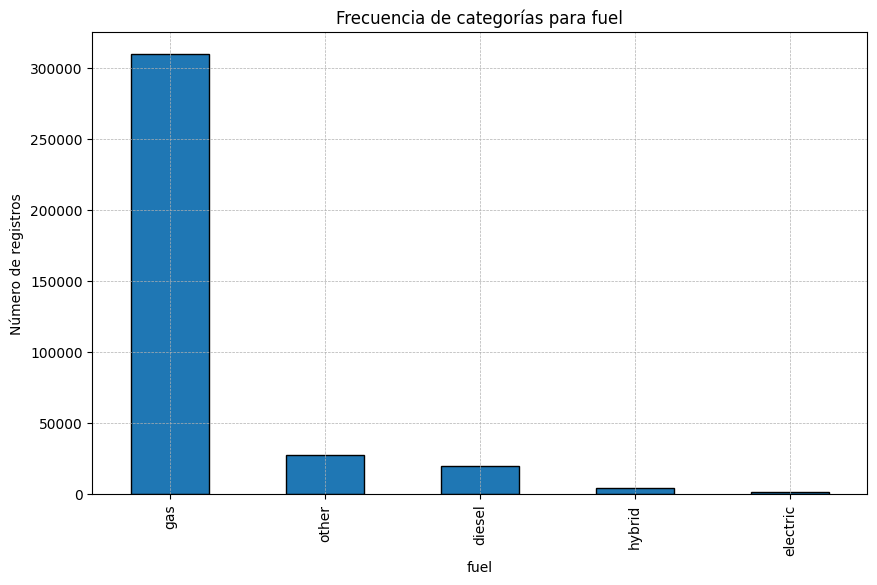

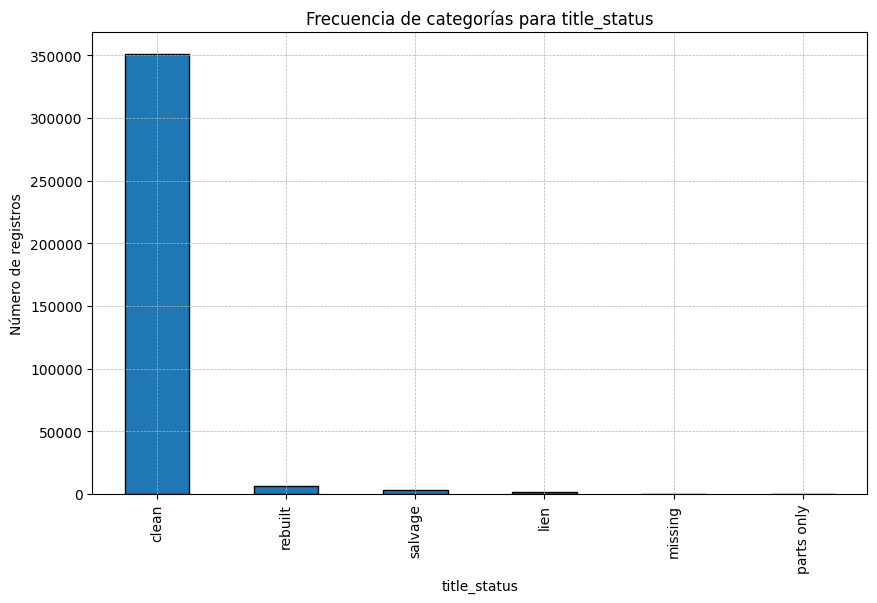

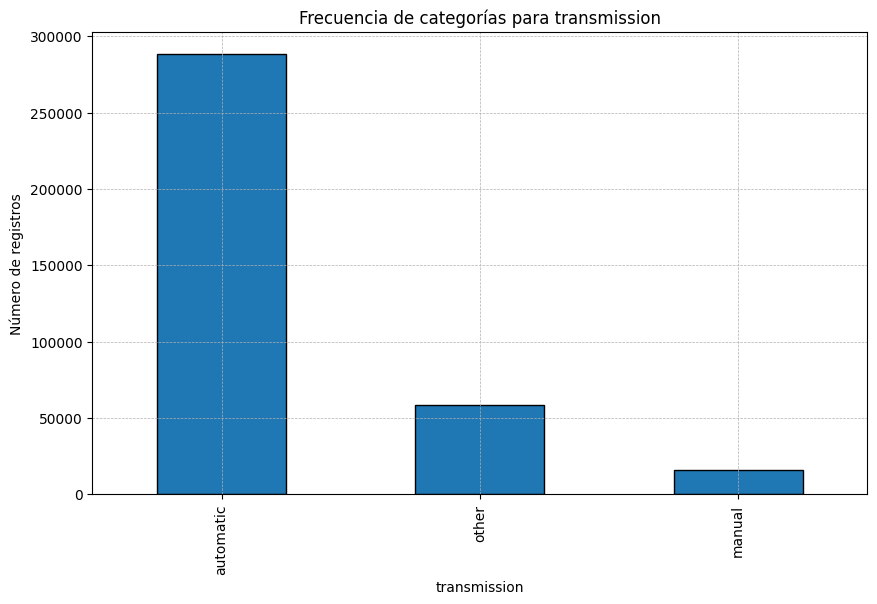

In [ ]:
for var in few_cardinal_variables:
    plt.figure(figsize=(10, 6))
    minmax_df[var].value_counts().plot(kind='bar', edgecolor='k')
    plt.title(f'Frecuencia de categorías para {var}')
    plt.ylabel('Número de registros')
    plt.xlabel(var)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`.


In [ ]:
# Aplicar codificación one-hot a las variables en few_cardinal_variables
minmax_df = pd.get_dummies(minmax_df, columns=few_cardinal_variables, drop_first=True)

# El parámetro drop_first=True se usa para evitar la multicolinealidad al eliminar la primera columna dummy para cada variable.

9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

In [ ]:
pip install category_encoders

In [ ]:
import category_encoders as ce
# Crear un codificador binario
encoder = ce.BinaryEncoder(cols=highly_cardinal_variables)

# Ajustar el codificador y transformar las columnas
minmax_df = encoder.fit_transform(minmax_df)

10. Concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y elimina las columnas categóricas originales. Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [ ]:
# Restablece los índices de los dataframes
encoder.reset_index(drop=True, inplace=True)
minmax_df.reset_index(drop=True, inplace=True)

# Concatena horizontalmente
final_df = pd.concat([encoder, minmax_df], axis=1)

# Elimina las columnas categóricas originales
final_df.drop(columns=categorical_cols, inplace=True)

AttributeError: ignored